In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
from scipy.ndimage import gaussian_filter
for i,f in enumerate(os.scandir("./data/gif/")):
    img=np.array(Image.open(f.path))
    for w in range(img.shape[0]):
        for h in range(img.shape[1]):
            if img[w][h]<4:
                img[w][h]=0
            else:
                img[w][h]=(img[w][h]-1)*(255/7.0)
    img=cv2.resize(img,(256,256))
    cv2.imwrite("./data/png/{}.png".format(f.name.split(".")[0]),img)
    break
for i,f in enumerate(os.scandir("./data/png")):
    if i==5:
        break
    img=cv2.imread(f.path)
    img=gaussian_filter(img,1)#ぼかすと検出されやすい
    print(f.name)
    fast=cv2.FastFeatureDetector_create(threshold=80)
    kp=fast.detect(img,None)
    img2=cv2.drawKeypoints(img,kp,None,color=(255,0,0))
    plt.imshow(img2,cmap="gray")
    plt.show()

In [ ]:
for i in os.scandir("./data/png"):
    img=cv2.imread(i.path)
    img=cv2.resize(img,(512,512))
    show_img=img.copy()
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    retval, img = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(img)
    print(img.shape)

    # ラベリング
    retval, labels ,stats,centroids= cv2.connectedComponentsWithStats(img)
    print(retval)
    # 結果表示
    for i in range(1, retval):
        x, y, width, height, area = stats[i] # x座標, y座標, 幅, 高さ, 面積
        print(stats[i])

        if area > 100: # 面積が１０画素以上の部分
            cv2.rectangle(show_img,(x,y),(x+width,y+height),(0,0,255),2)
            cv2.putText(show_img, f"[{i}]:{area}", (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)

    plt.imshow(show_img,cmap="gray")
    plt.show()

    break



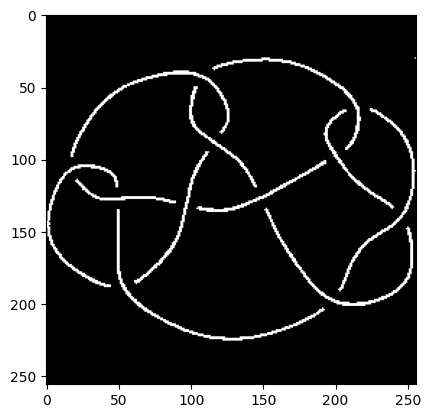

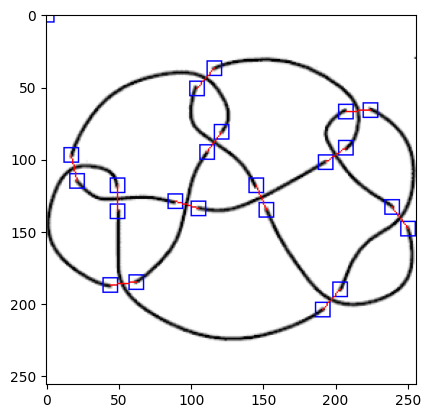

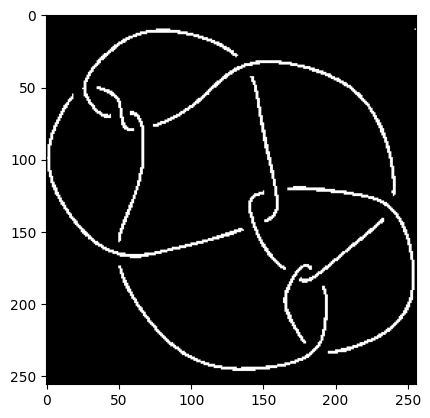

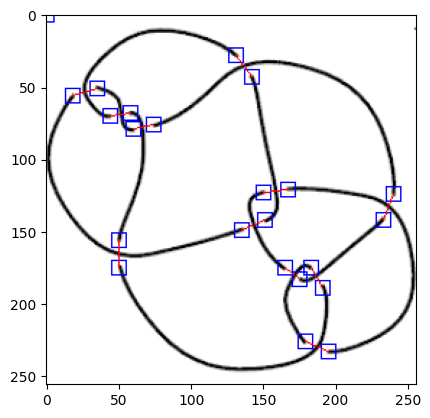

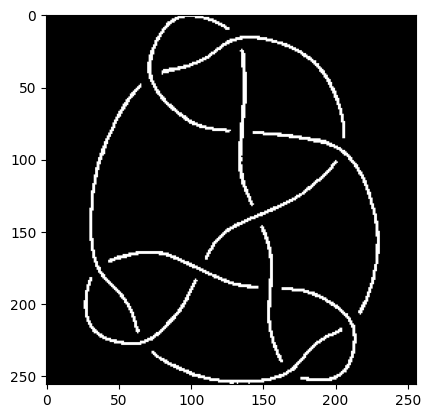

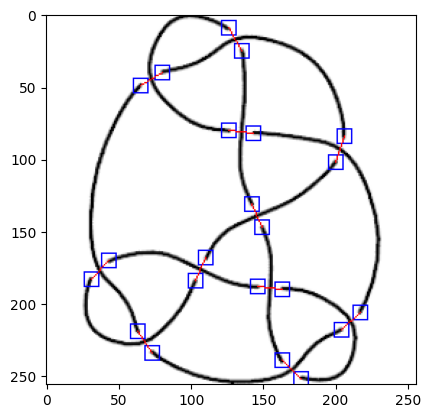

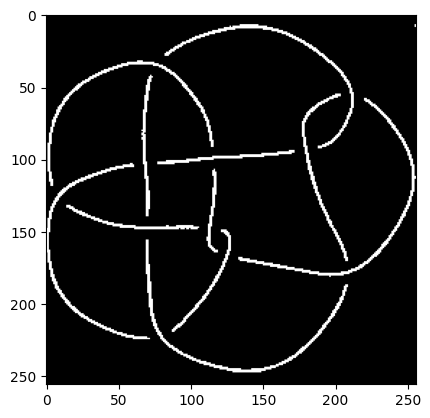

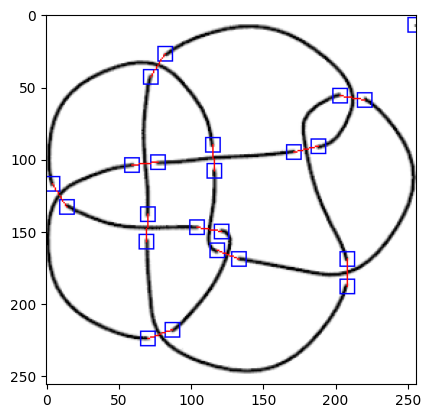

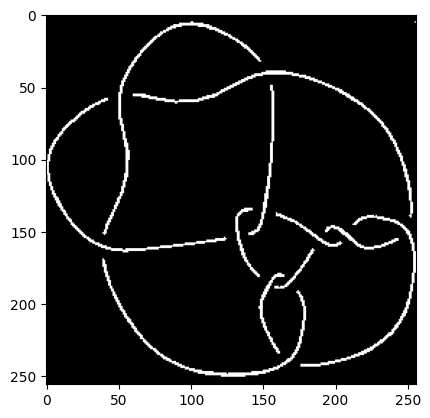

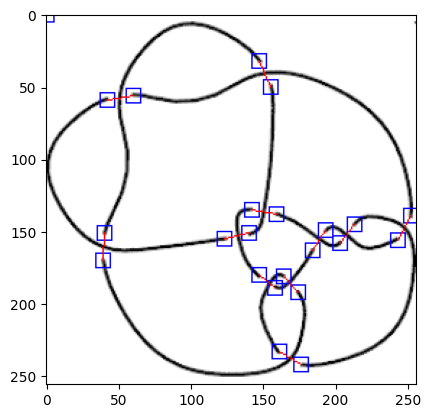

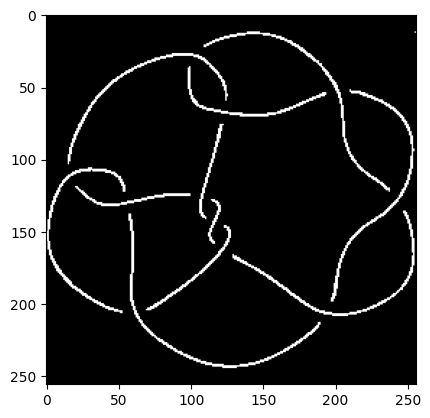

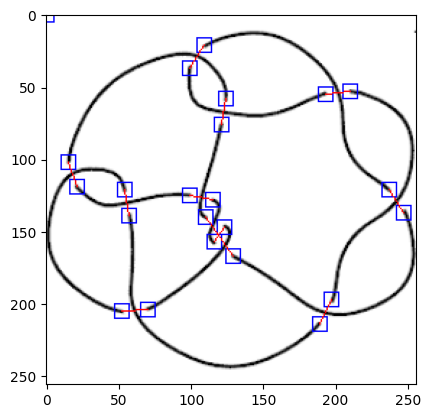

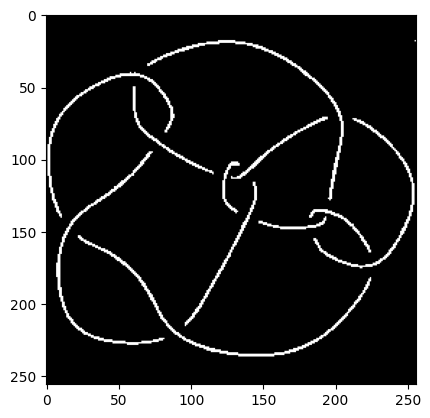

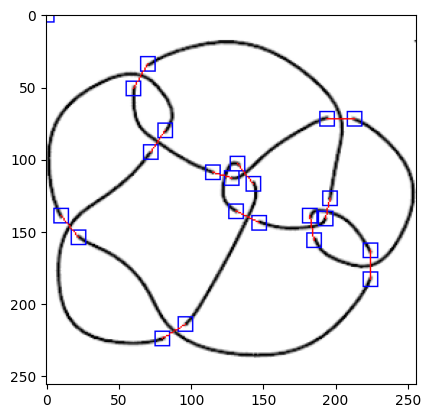

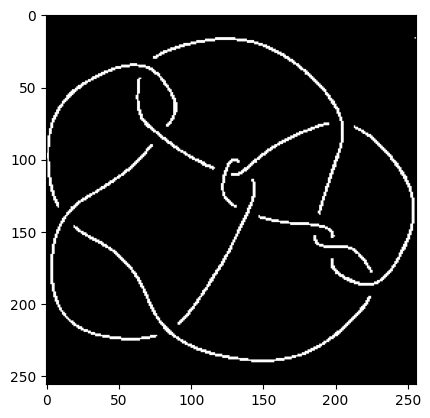

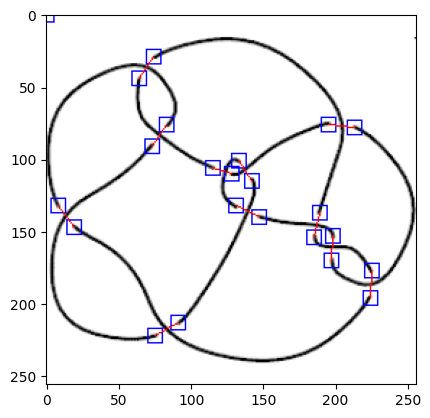

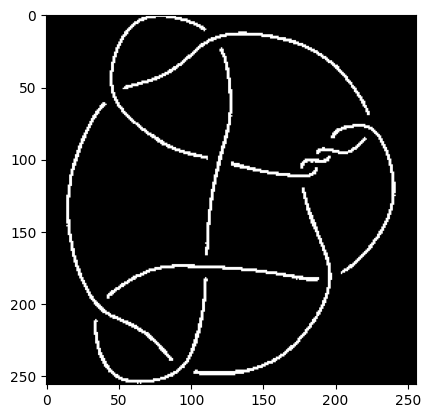

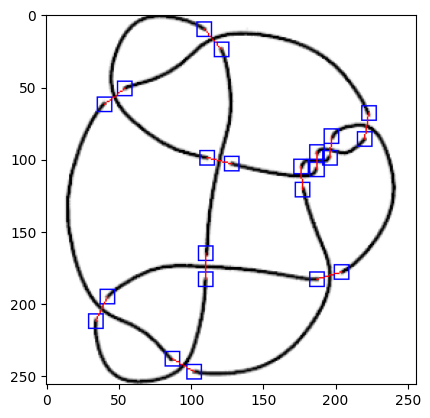

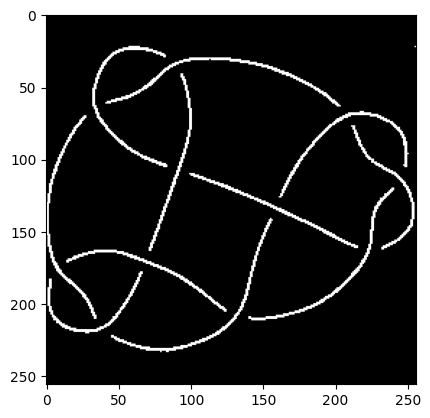

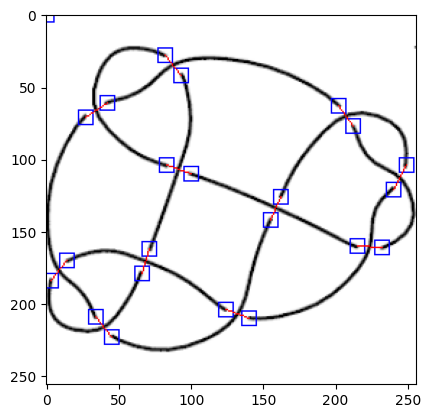

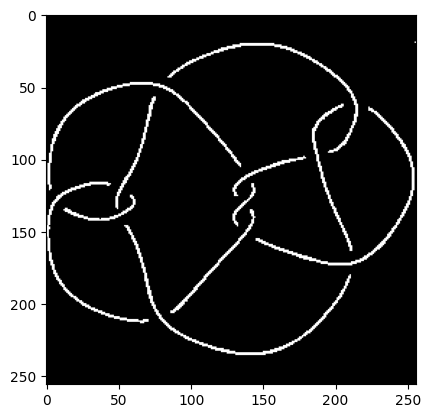

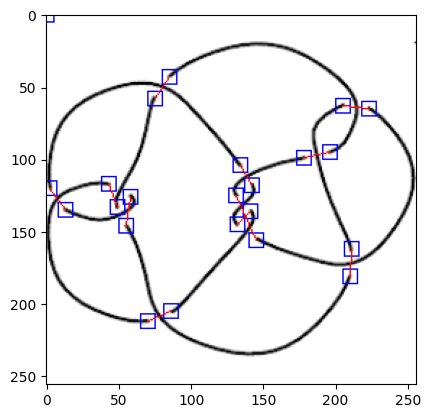

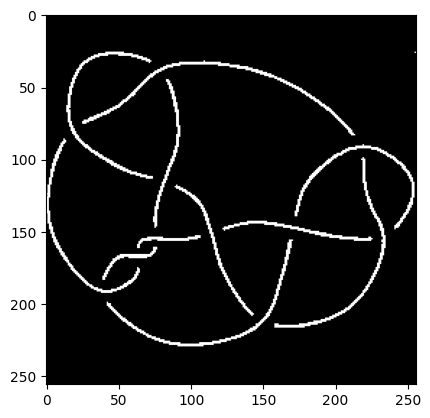

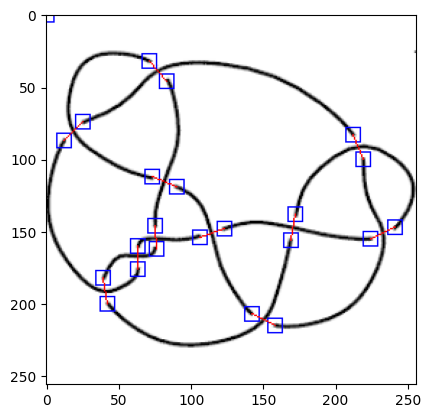

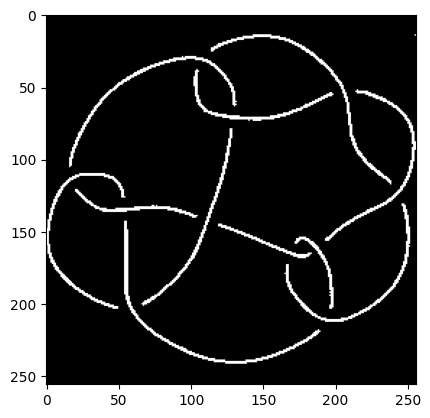

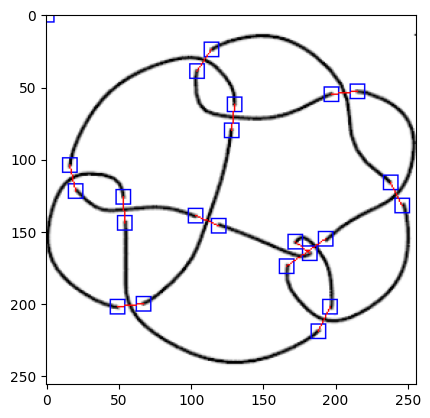

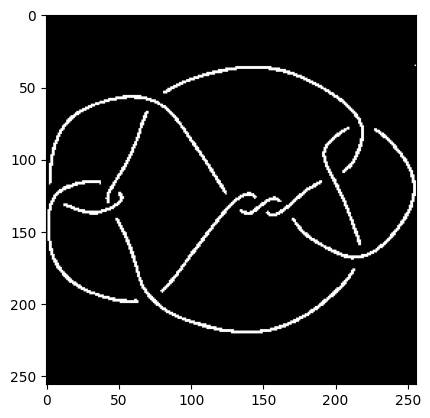

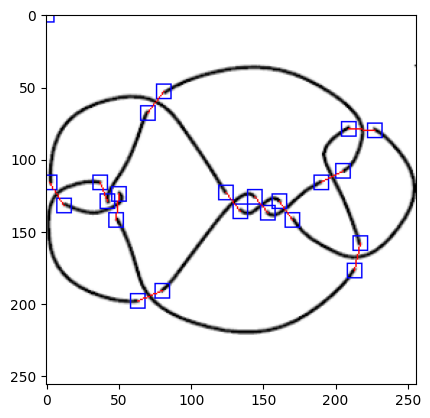

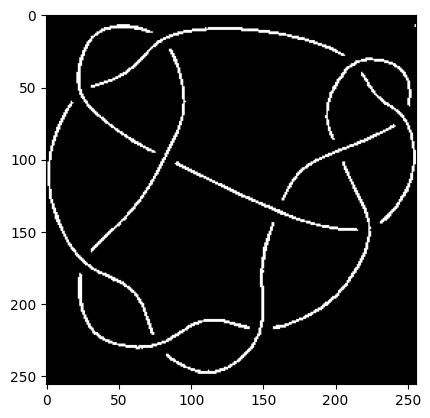

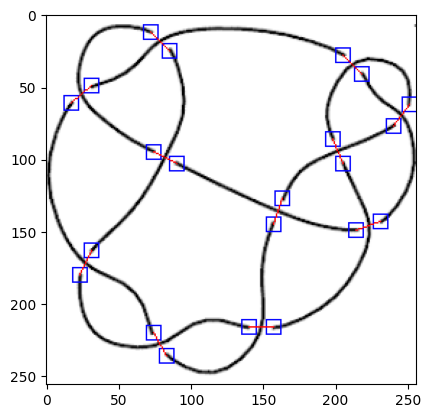

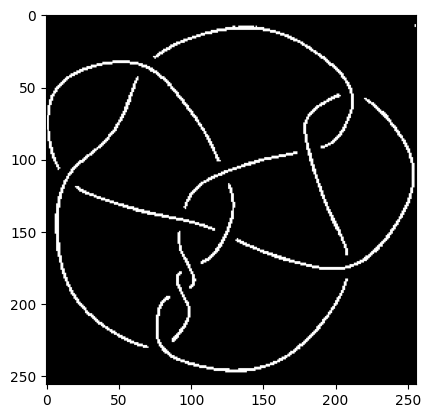

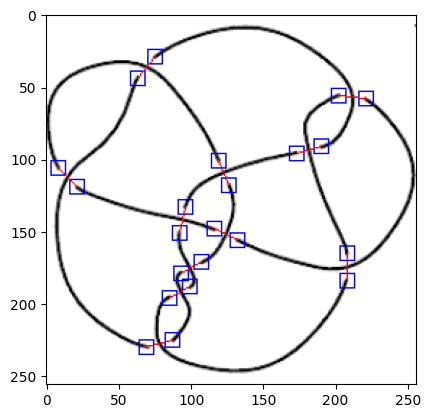

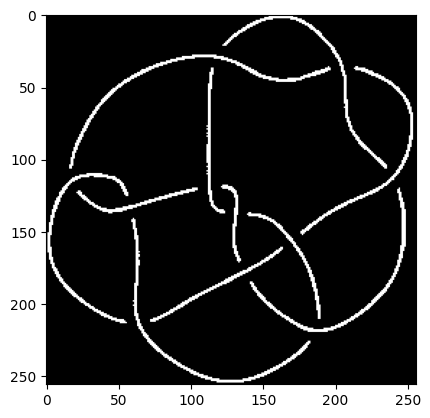

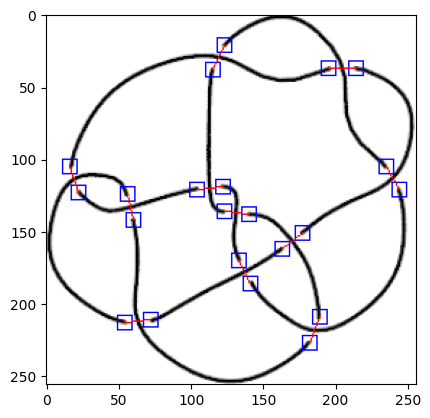

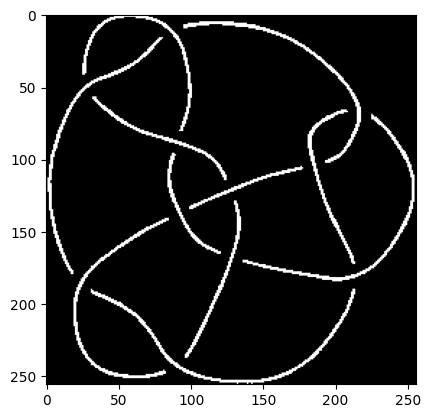

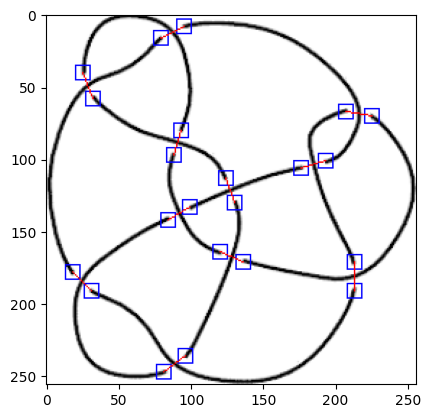

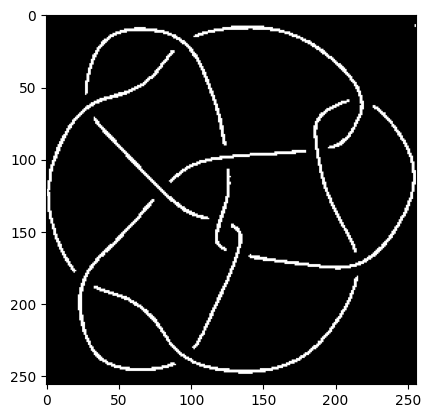

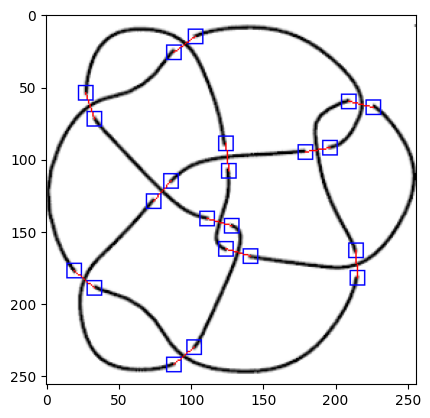

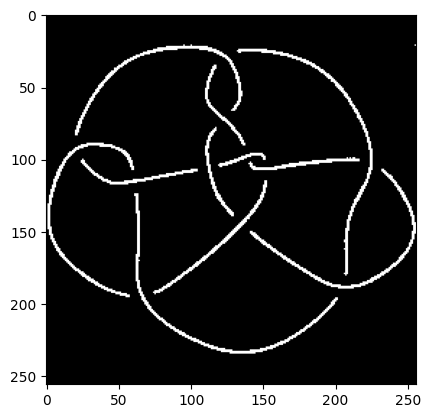

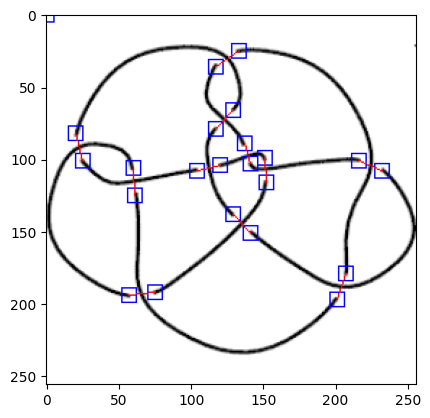

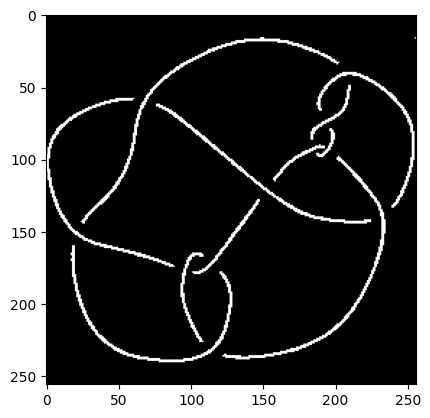

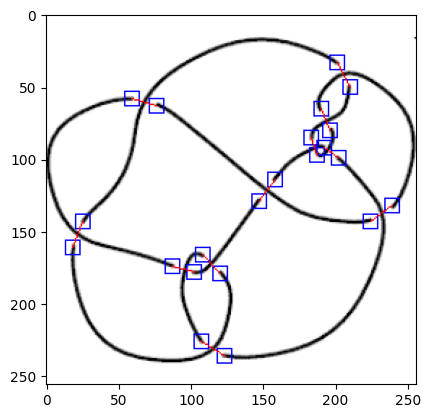

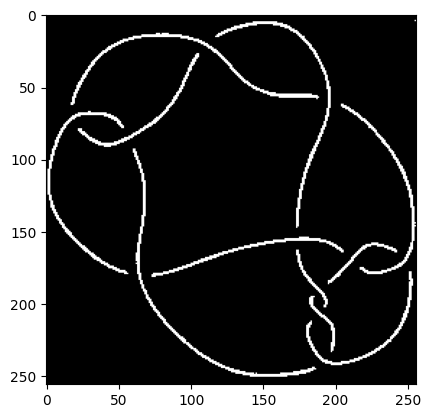

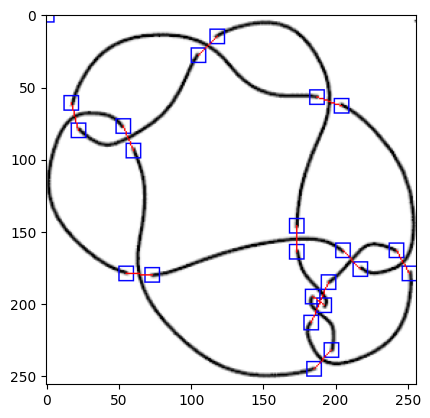

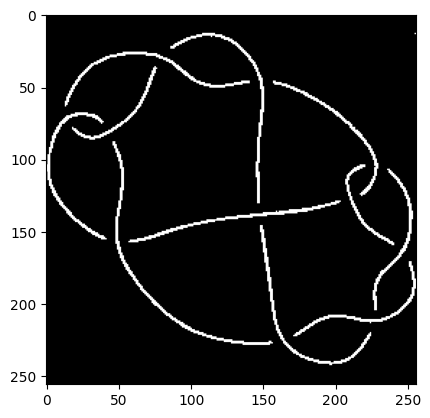

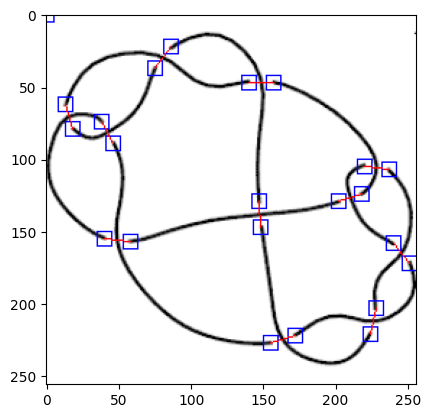

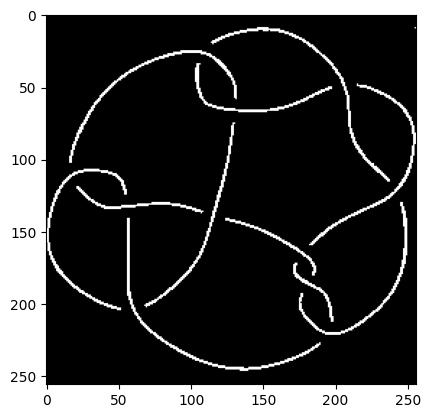

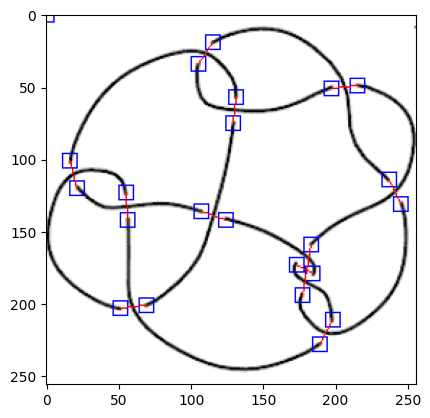

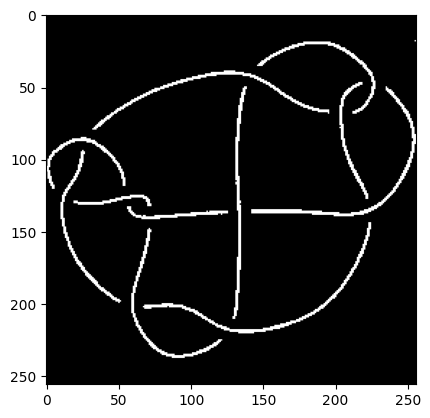

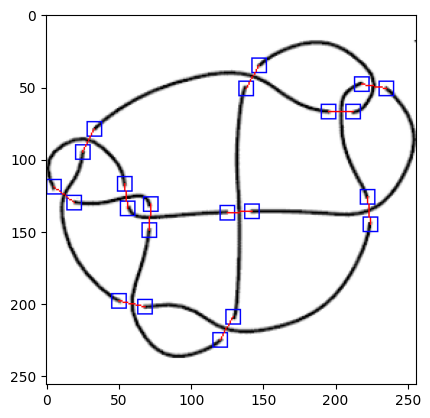

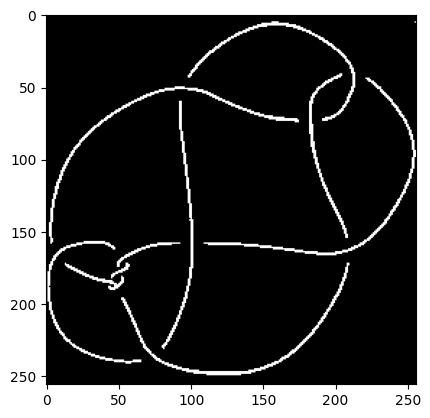

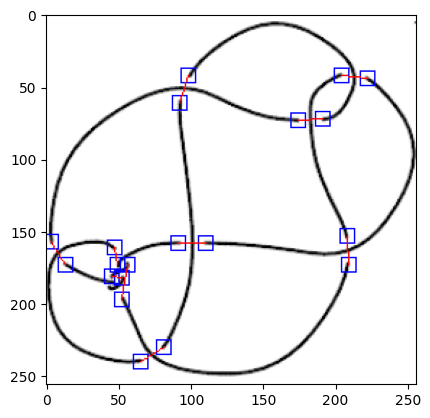

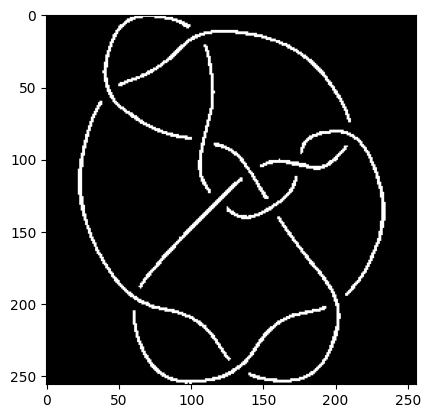

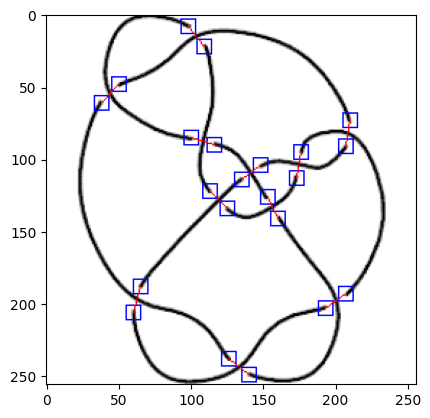

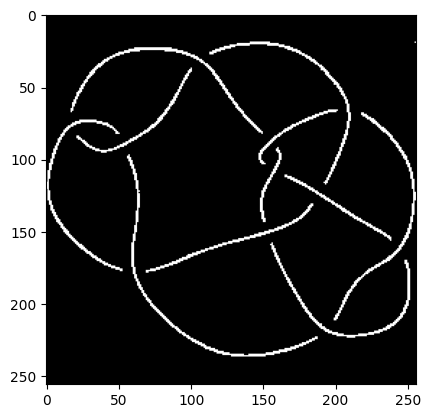

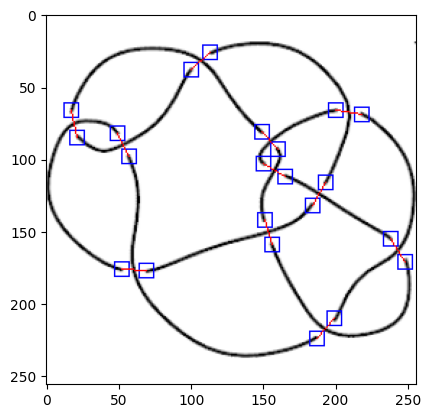

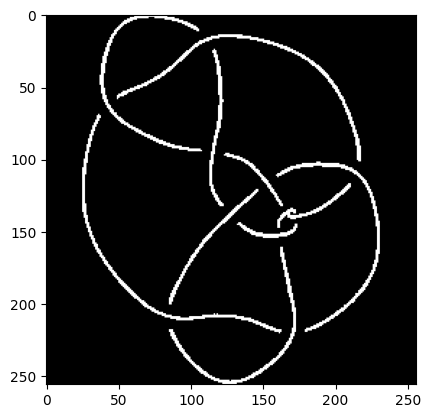

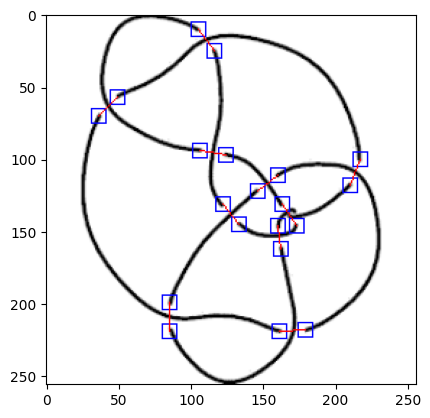

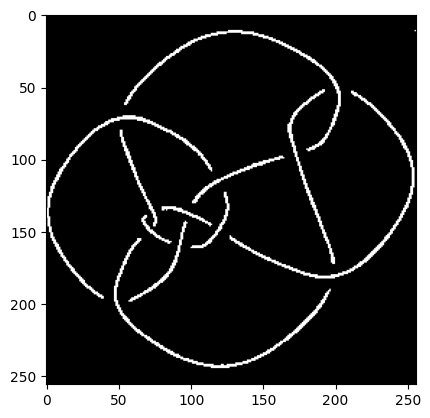

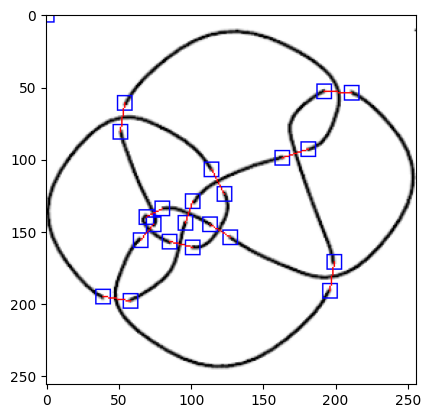

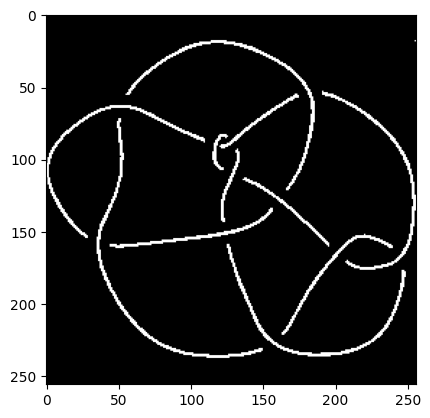

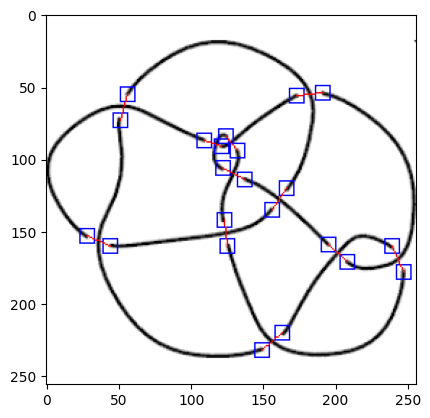

In [37]:
from collections import deque
size=256
img_check=np.zeros((size,size),dtype=bool)
def bfs(img,x,y):
    q=deque()
    q.append((x,y))
    img_count=np.zeros((size,size))
    img_count[y][x]=1
    img_check[y][x]=True
    retval=[0,0]
    while(len(q)>0):
        curr_x,curr_y=q.popleft()
        if curr_x-1<0:
            pass
        elif img[curr_y][curr_x-1]==255 and img_count[curr_y][curr_x-1]==0:
            q.append((curr_x-1,curr_y))
            img_count[curr_y][curr_x-1]=img_count[curr_y][curr_x]+1
            img_check[curr_y][curr_x-1]=img_check[curr_y][curr_x]
            retval=[curr_x,curr_y]
        if curr_x+1>255:
            pass
        elif img[curr_y][curr_x+1]==255 and img_count[curr_y][curr_x+1]==0:
            q.append((curr_x+1,curr_y))
            img_count[curr_y][curr_x+1]=img_count[curr_y][curr_x]+1
            img_check[curr_y][curr_x+1]=img_check[curr_y][curr_x]
            retval=[curr_x,curr_y]
        if curr_y-1<0:
            pass
        elif img[curr_y-1][curr_x]==255 and img_count[curr_y-1][curr_x]==0:
            q.append((curr_x,curr_y-1))
            img_count[curr_y-1][curr_x]=img_count[curr_y][curr_x]+1
            img_check[curr_y-1][curr_x]=img_check[curr_y][curr_x]
            retval=[curr_x,curr_y]
        if curr_y+1>255:
            pass
        elif img[curr_y+1][curr_x]==255 and img_count[curr_y+1][curr_x]==0:
            q.append((curr_x,curr_y+1))
            img_count[curr_y+1][curr_x]=img_count[curr_y][curr_x]+1
            img_check[curr_y+1][curr_x]=img_check[curr_y][curr_x]
            retval=[curr_x,curr_y]
    return retval

for i,png in enumerate(os.scandir("./data/png"),start=1):
    img=cv2.imread(png.path)
    img=cv2.resize(img,(size,size))
    show_img=img.copy()
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    retval, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    edge_list=[]
    checked_edge_list=[]
    for w in range(size):
        for h in range(size):
            if img[h][w]==255 and not img_check[h][w]:
                x,y=bfs(img,w,h)
                edge_list.append((x,y))
                cv2.rectangle(show_img,(x-5,y-5),(x+5,y+5),(0,0,255),1)
                x,y=bfs(img,x,y)
                edge_list.append((x,y))
                cv2.rectangle(show_img,(x-5,y-5),(x+5,y+5),(0,0,255),1)
    for x1,y1 in edge_list:
        min_dist,min_point=2*size,None
        for x2,y2 in edge_list:
            if (x1,y1) in checked_edge_list or (x2,y2) in checked_edge_list:
                continue
            if x1==x2 and y1==y2:
                continue
            if ((x1-x2)**2+(y1-y2)**2)**(1/2)<min_dist:
                min_point=(x2,y2)
                min_dist= ((x1-x2)**2+(y1-y2)**2)**(1/2)
        if min_point!=None:
            cv2.line(show_img,pt1=(x1,y1),pt2=min_point,color=(255,0,0),thickness=1)
        checked_edge_list.append((x1,y1))
        checked_edge_list.append(min_point)

            
    plt.imshow(img,cmap="gray")
    plt.show()
    plt.imshow(show_img)
    plt.show()
    if i>30:
        break
    